In [27]:
import tensorflow as tf
from tensorflow import keras
from os import path, getcwd, chdir
from keras.datasets import mnist  

In [28]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0 

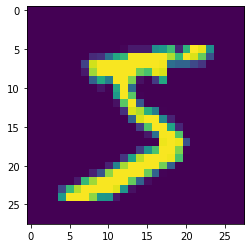

In [29]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])
print(x_train[0])
# it's a 5

In [30]:
#normalizing the images
x_train  = x_train / 255.0
y_test = y_test / 255.0

In [31]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [32]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs ={} ):
        if (logs.get('accuracy') >= 0.99):
            self.model.stop_training = True
            
callbacks = myCallBack()

In [33]:
model.compile(optimizer = tf.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [34]:
model.fit(x_train, y_train, epochs = 10, callbacks = [callbacks])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1999 - accuracy: 0.9406
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0805 - accuracy: 0.9754
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0522 - accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0356 - accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0279 - accuracy: 0.9912


In [35]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5055.2866 - accuracy: 0.0971


[5055.28662109375, 0.09709999710321426]